# ML PROJECT 9



In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       504 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,504.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285875,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703732,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.626000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [9]:
# housing.hist(bins =50, figsize = (20,15))

## Traning-Testing Split

In [10]:
# import numpy as np
# np.random.seed(42)
# def split_train_test(data, test_ratio):
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)

In [12]:
import sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"train set: {len(train_set)}\ntest set: {len(test_set)}")

train set: 404
test set: 102


## startified shuffling

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [14]:
strat_test_set['CHAS'].value_counts()



0    95
1     7
Name: CHAS, dtype: int64

In [15]:
# it will divide them with equal percentage so that  data will be divided equally

In [16]:
housing = strat_train_set.copy()

## corelations

In [17]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680055
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [18]:
from pandas.plotting import scatter_matrix

In [19]:
attr = ['MEDV', 'RM', 'TAX']

In [20]:
# scatter_matrix(housing[attr], figsize = (12,8), alpha = 1)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

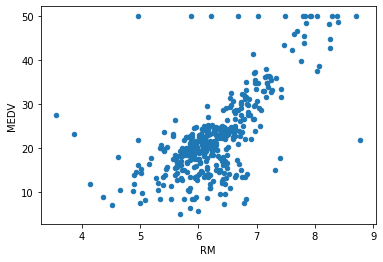

In [21]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 1)

## attr combinations 

In [22]:
housing["TPRM"] = housing["TAX"]/housing["RM"]

In [23]:
# housing["TPRM"]

#CHECKING RELATION OF TPRM WITH MEDV

In [24]:
ncorr = housing.corr()
ncorr['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680055
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TPRM      -0.525989
LSTAT     -0.740494
Name: MEDV, dtype: float64

the new attribute which we made gave the 2nd high negative correlation with price

## Separating features and labels

In [25]:
housing = strat_train_set.drop("MEDV", axis = 1)

housing_labels = strat_train_set["MEDV"].copy()

# Adding imputer for filling missining datas

In [31]:
import numpy as np
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values= np.nan, strategy='median')
# imputer.fit(housing)

In [32]:
# imputer.statistics_


In [33]:
# X = imputer.transform(housing)

In [34]:
# housing_n = pd.DataFrame(X,columns=housing.columns)

In [35]:
# housing_n.describe()

## Creating pipeline

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [37]:
housing_new = my_pipeline.fit_transform(housing)

In [38]:
housing_new.shape

(404, 13)

## model selection

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model  = RandomForestRegressor()
model.fit(housing_new, housing_labels)

RandomForestRegressor()

In [40]:
some_data = housing.iloc[:5]

In [41]:
some_labels = housing_labels.iloc[:5]

In [42]:
prepared_data = my_pipeline.transform(some_data)

In [43]:
model.predict(prepared_data)

array([22.234, 25.616, 16.544, 23.346, 23.36 ])

In [44]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [45]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_new)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [46]:
rmse
# 23.32483723030002
# here linear regression's error is 23 which is big so trying another model

#0.0
# here decison tree is getting 0 error which means it has overfed the data 
# instead of understanding the data it has stick to the noise which will be not good so we will discard this model.


1.2117315029116444

 ## Using cross-validation

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_new, housing_labels, scoring="neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [48]:
rmse_scores

array([2.73633973, 2.76633748, 4.35761988, 2.56140647, 3.48090544,
       2.66278755, 4.84818949, 3.3502467 , 2.75064875, 3.19614022])

In [49]:
#see the errors by using cross validation we checked that how a model is performing its just a evaluting technique
# array([4.05757347, 5.54977477, 5.44697276, 4.08199497, 4.03967821,
#        3.85917737, 5.30959038, 3.8524343 , 3.46947402, 3.57134428])
# by decision tree normal error was 0 but by this error is coming 
#  lets see for linear
# array([4.21808915, 4.25889643, 5.10487572, 3.84216232, 5.34266594,
#        4.37567758, 7.47256865, 5.47742492, 4.14898313, 6.06744662])
#  see here decosion tree is better

# Writing a function for printing deviation of cross validation 

In [50]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std deviation:", scores.std())

In [51]:
print_scores(rmse_scores)

Scores: [2.73633973 2.76633748 4.35761988 2.56140647 3.48090544 2.66278755
 4.84818949 3.3502467  2.75064875 3.19614022]
Mean: 3.271062171353839
Std deviation: 0.7354570282526347


## saving the model


In [52]:
from joblib import dump, load
dump(model, 'Price.joblib')

['Price.joblib']

## Testing the model

In [53]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [54]:
final_rmse

2.9211634433466904

In [55]:
print(f"Final predictions: {final_prediction}\n\n\n\nReal answers: {list(Y_test)}")

Final predictions: [24.66  11.845 26.068 22.207 18.507 14.683 20.456 14.631 31.529 41.959
 19.763 12.177 25.004 27.528 19.415 11.127 31.958 14.356 23.779 18.939
 19.393 17.822 17.055 22.073 18.671 32.085 16.43  33.582  9.222 33.101
 23.812 21.527 23.047 11.086 21.42  11.265 42.434 24.679 23.255 41.821
 24.139 30.002 20.151 20.771 18.953 33.356 44.273 20.022 20.472 20.973
 21.136 14.536 21.707 14.953 25.507 33.186 41.091 29.044 19.532 20.852
 46.874  9.753 18.767 25.687 14.934 32.389 20.117 17.7   19.247 33.925
 26.35  22.911 21.046 22.549 34.124 12.823 15.77  20.198 20.719 21.374
 22.456 20.854 13.492 23.201 20.873 21.192 14.218 21.168 21.575 23.183
 18.67  27.193  7.245 27.209 19.122 30.202 19.907 30.641 14.456 27.073
 21.371 20.715]



Real answers: [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0

In [56]:
prepared_data[0]


array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24319862, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [57]:
X_test_prepared[0]

array([-0.44228927, -0.4898311 , -1.37640684, -0.27288841, -0.34321545,
        0.36373032, -0.33092752,  1.20235683, -1.0016859 ,  0.05733231,
       -1.21003475,  0.38110555, -0.57309194])